# データ分布の形を捉える（R編）
サンプルデータを読み込んで、散布図を書いてみよう！</br>
（『[RとPythonで学ぶ実践的データサイエンス&機械学習]( https://www.amazon.co.jp/dp/429710508X/ref=cm_sw_em_r_mt_dp_hXISFbNZQVC16)』より抜粋　P.107~109）
（Pythonコードサンプルはなし）</br>
データやコードから、日本語は省いた方が良いかもしれません。。。

In [1]:
# 高校生の身長データを読み込む
DF <- read.table("https://raw.githubusercontent.com/mkato-riken/test/main/height.csv", sep = ",", header = TRUE, stringsAsFactors = FALSE)

In [2]:
# データの構造と項目の一覧を確認する
str(DF)

'data.frame':	1998 obs. of  2 variables:
 $ height: num  156 172 159 167 170 ...
 $ gender: chr  "F" "M" "F" "M" ...


In [3]:
# データフレームの先頭を表示
head(DF)

,height,gender
,<dbl>,<chr>
1,156.2,F
2,172.1,M
3,159.0,F
4,167.4,M
5,169.6,M
6,173.4,M


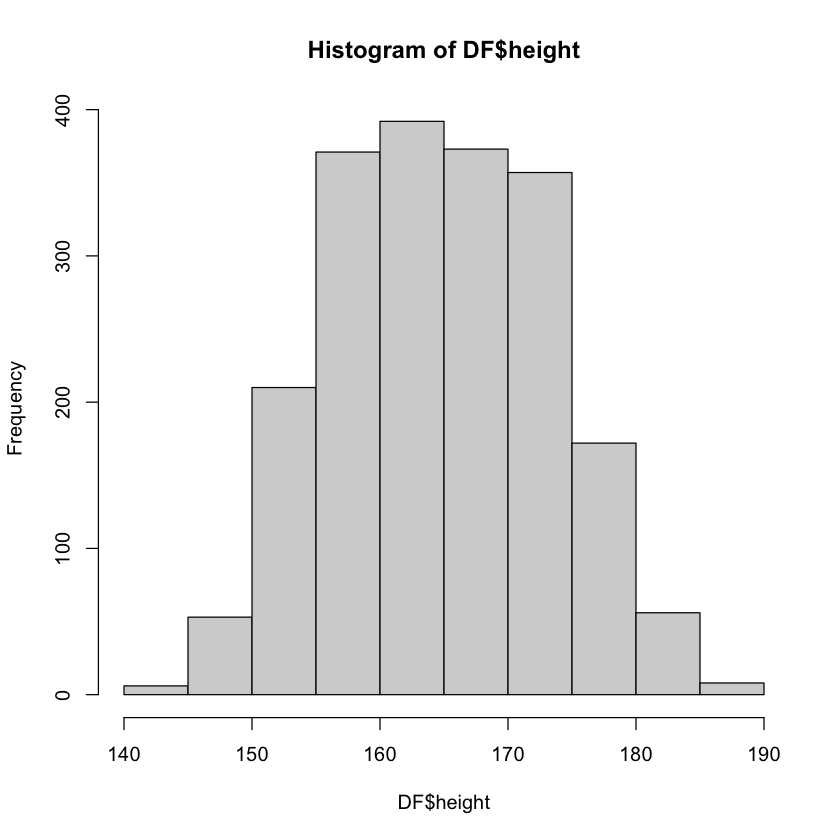

In [4]:
# 身長のひつとグラム描く
hist(DF$height)

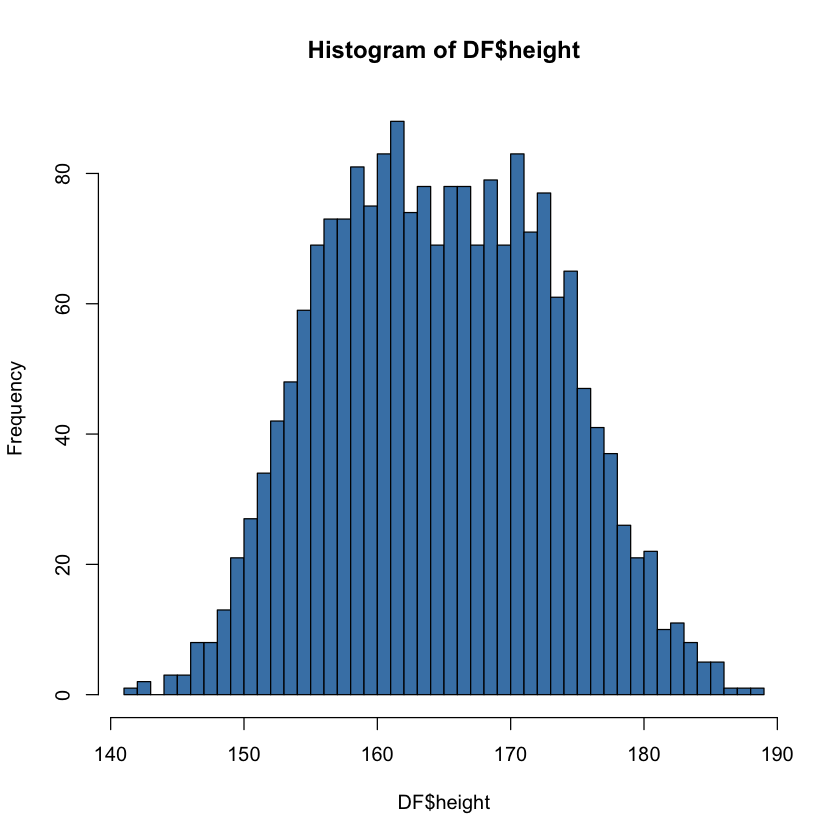

In [5]:
# 色、分割数を変えてタイトルをつける
hist(DF$height, col="steelblue", breaks =50)

日本語のタイトルが豆腐になってしまう。。。。

In [6]:
# ggplot2ライブラリを使って描く
library(ggplot2)

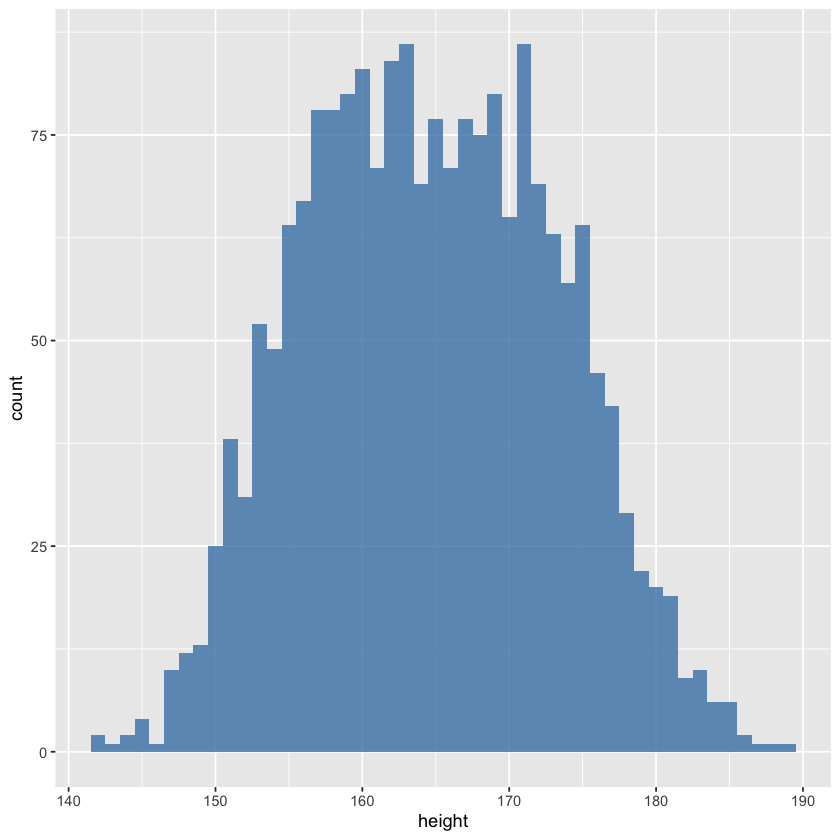

In [7]:
ggplot(DF)+                          # データフレームの指定
  geom_histogram(aes(height),       # 描画の対象となる変数
                    fill="steelblue",   # 塗り色の指定
                    alpha=0.8,       # 透明度の指定
                    binwidth=1)      # 階級の幅（１cm刻み）

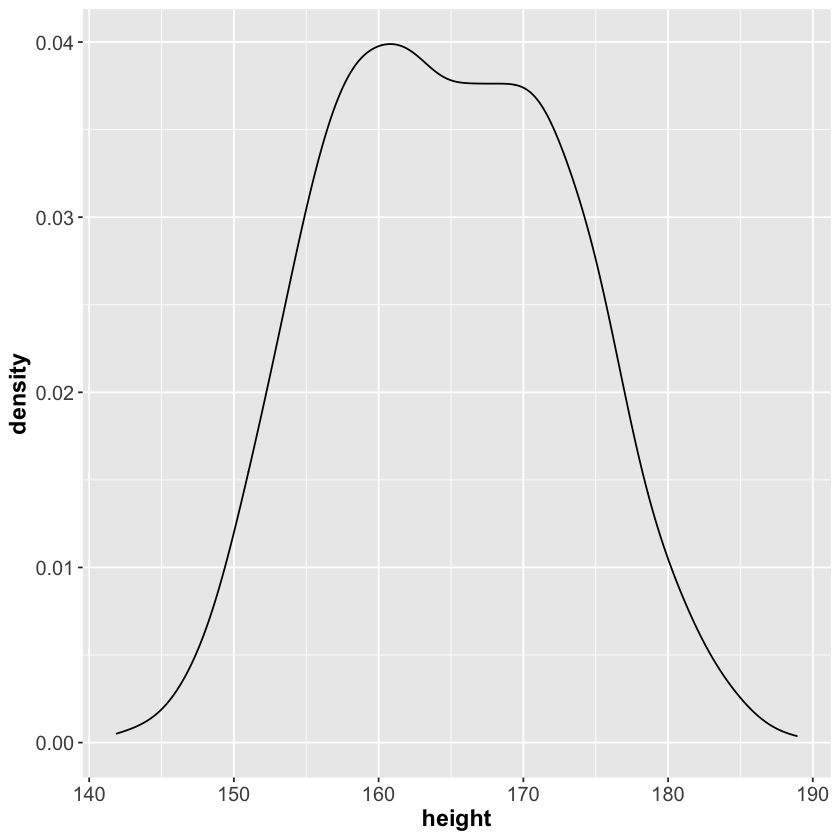

In [8]:
# 密度プロットを描く
ggplot(DF)+                                     #データフレームの指定
  geom_density(aes(height)) +                  # 描画の対象となる変数
  theme(axis.text = element_text(size=12),     # 文字サイズの指定
          axis.title= element_text(size=14, face="bold"))　　

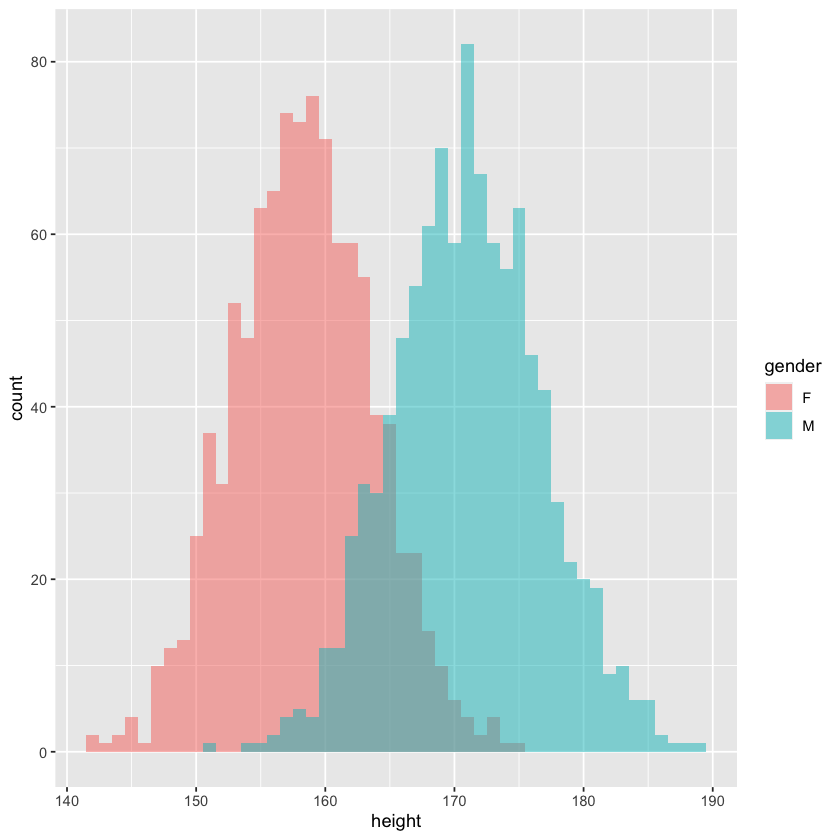

In [9]:
# 性別で色分けしてヒストグラムを描く
ggplot(DF)+
  geom_histogram(aes(x = height,
                        fill=gender),
                    position="identity",
                    alpha=0.5,
                    binwidth=1)

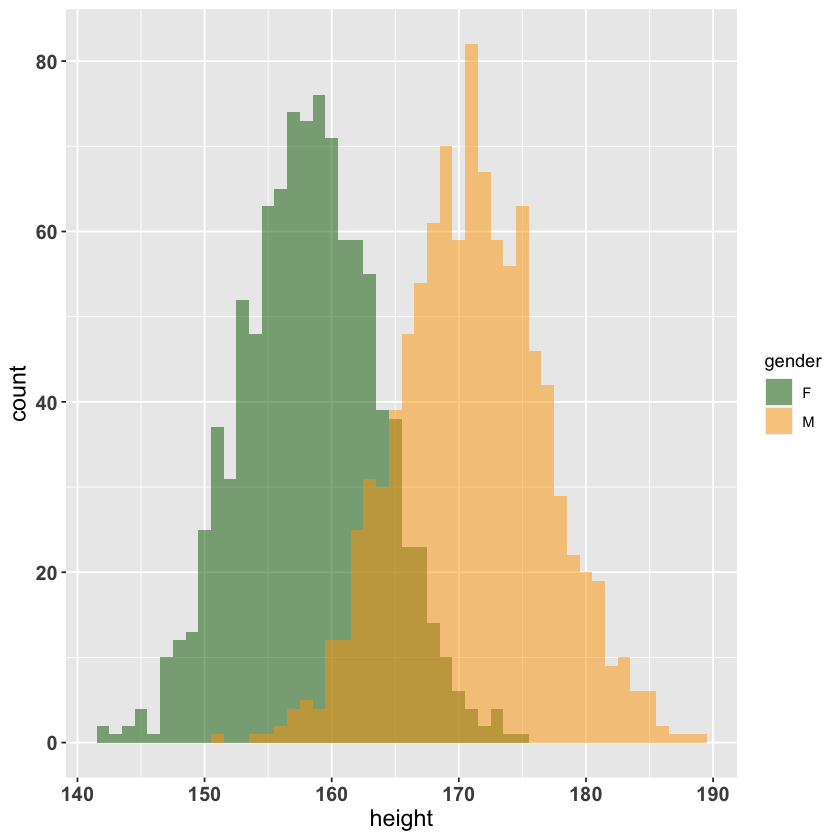

In [10]:
# 色を指定することも可能
ggplot(DF)+
  geom_histogram(aes(x = height,
                        fill=gender),
                    position="identity",
                    alpha=0.5,
                    binwidth=1) + #色分けの指定を足す（+で繋げる）
  scale_fill_manual(values=c("darkgreen", "orange")) +
  theme(axis.text = element_text(size=12, face="bold"),
          axis.title=element_text(size=14))

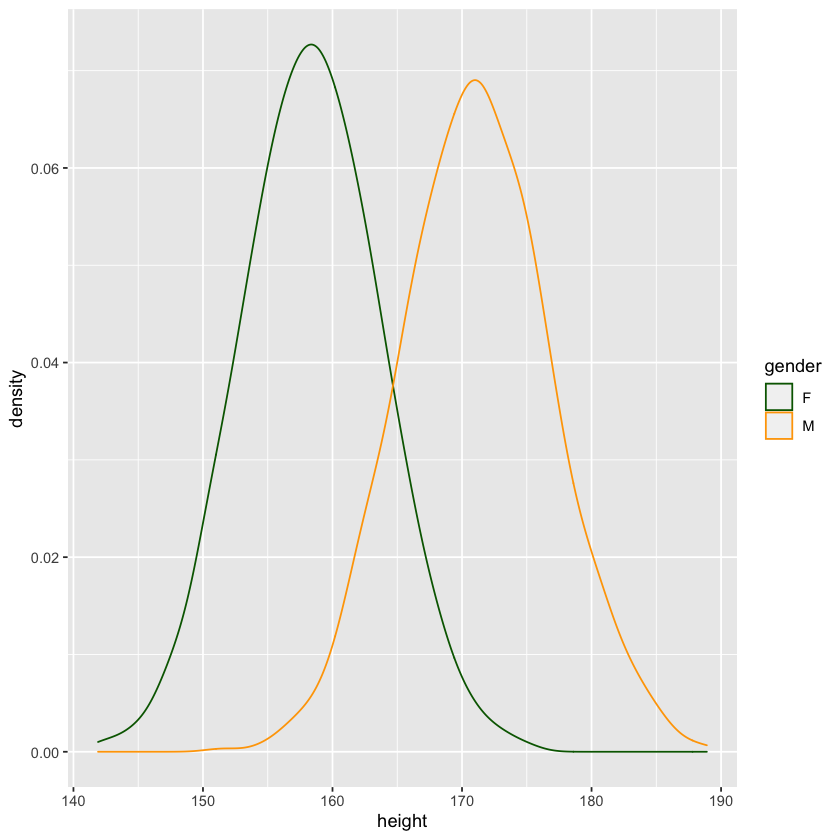

In [11]:
# 性別で色分けして密度プロットを描く
ggplot(DF)+
  geom_density(aes(x=height,
                color=gender)) +
  scale_color_manual(values=c("darkgreen", "orange"))

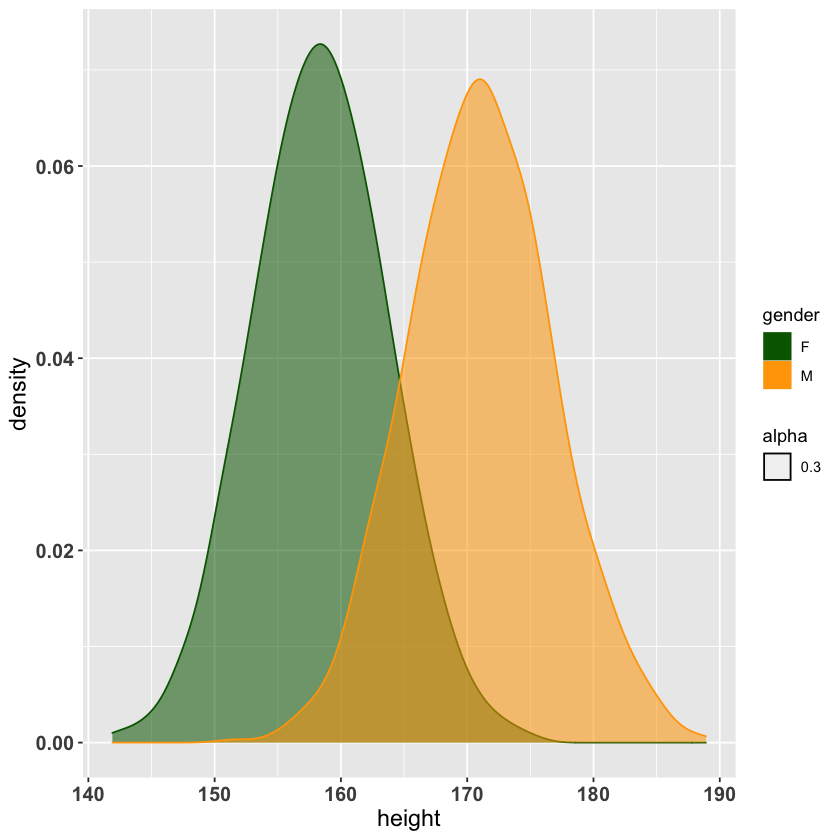

In [12]:
# 密度プロットの中を塗ることも可能
ggplot(DF)+
  geom_density(aes(x=height,
                color=gender,
                fill=gender,
                alpha=0.3)) +
  scale_color_manual(values=c("darkgreen", "orange")) +
  scale_fill_manual(values=c("darkgreen", "orange")) +
  theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=14))

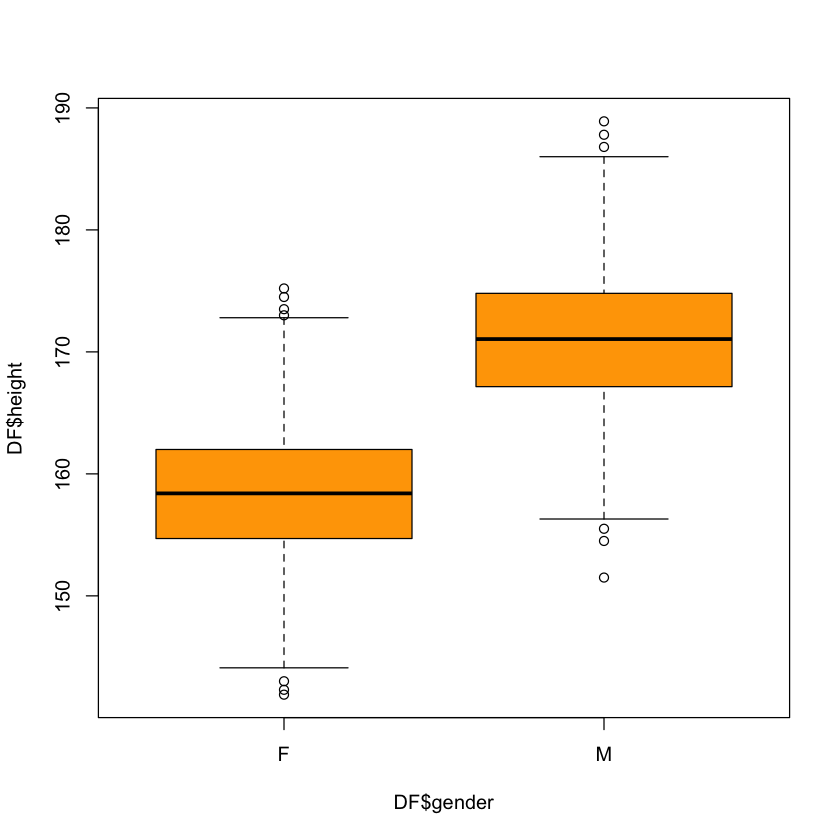

In [13]:
# 性別でグループ分けをしてボックスプロットを描く
boxplot(DF$height ~ DF$gender,
        col="orange")

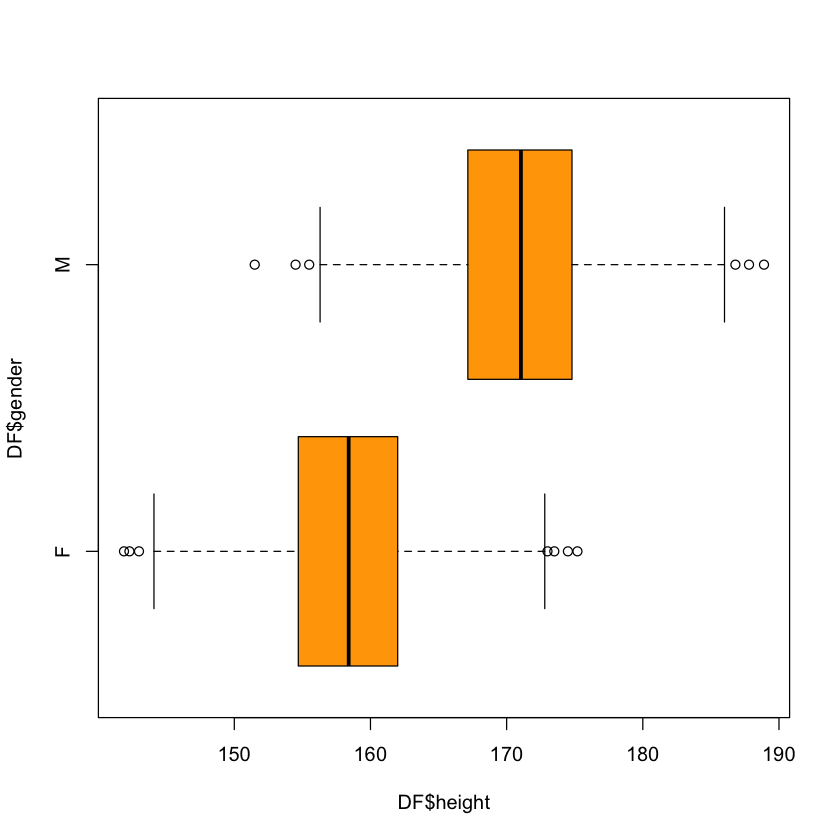

In [14]:
boxplot(DF$height ~ DF$gender,
        col="orange",
        horizontal=T　) # 横向き指定

タイトル（日本語）が豆腐、、、R studioでは、par(family= "HiraKakuProN-W3") で解決したが、GoogleColabでは解決しない。</br>
日本語は使用しないほうが良いか、、、？？？　

Warning message in axis(side = 2, at = 1:2, labels = c("F", "M")):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuProN-W3' が見付かりません ”
Warning message in axis(side = 2, at = 1:2, labels = c("F", "M")):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuProN-W3' が見付かりません ”
Warning message in axis(side = 2, at = 1:2, labels = c("F", "M")):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuProN-W3' が見付かりません ”
Warning message in axis(side = 2, at = 1:2, labels = c("F", "M")):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuProN-W3' が見付かりません ”
Warning message in axis(side = 2, at = 1:2, labels = c("F", "M")):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuProN-W3' が見付かりません ”
Warning message in axis(side = 2, at = 1:2, labels = c("F", "M")):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuProN-W3' が見付かりません ”
Warning message in axis(side = side, at = at, labels = labels, ...):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuProN-W3' が見付かりません ”
Warning message in axis(side = side, at = at, labels = labels, ...):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKaku

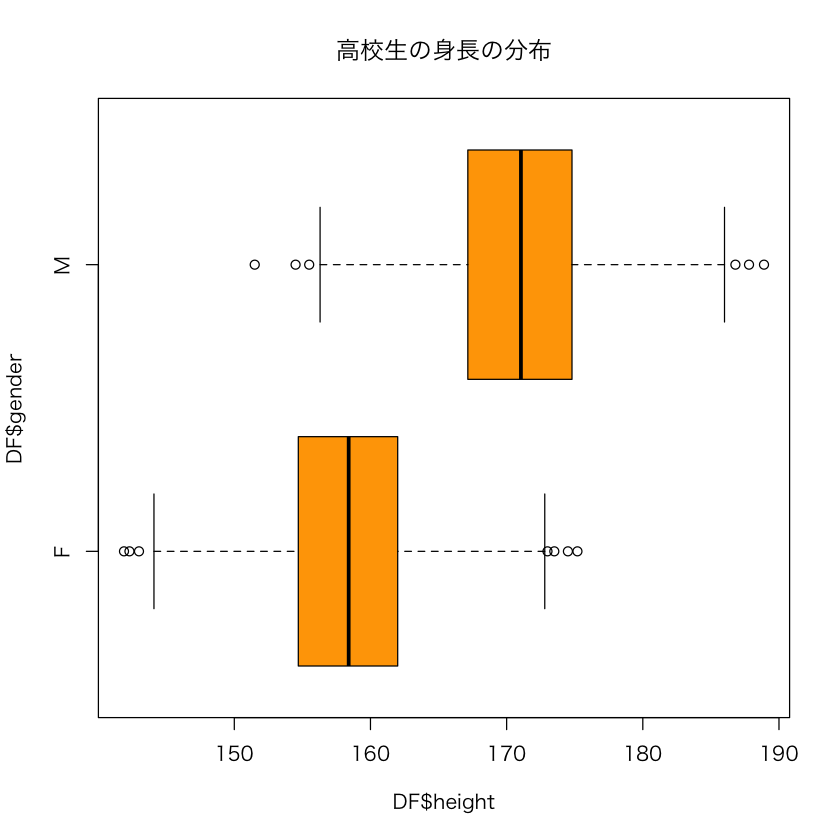

In [15]:
par(family= "HiraKakuProN-W3") #フォンと指定-> 文字化けなおらない、、、、
boxplot(DF$height ~ DF$gender,
        col="orange",
        horizontal=T,
        main="高校生の身長の分布", )

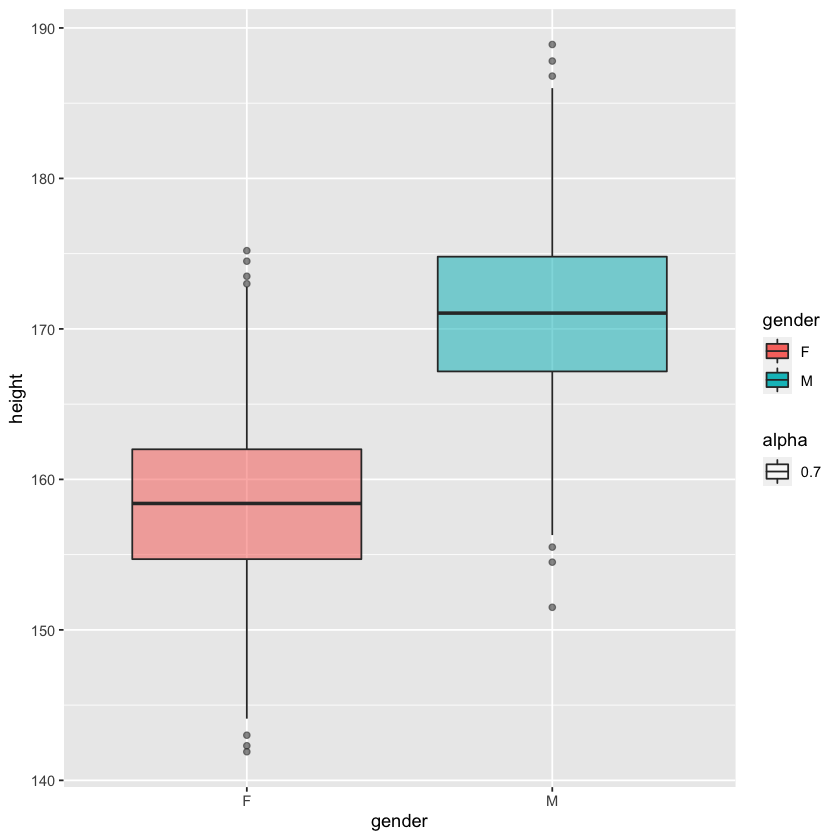

In [16]:
# ggplot2ライブラリを使って描く
ggplot(DF)+                           #データフレームの指定
  geom_boxplot(aes(y=height,        　#縦軸の変数
                      x=gender,       #グループ化を行う変数
                      fill=gender,     　#塗り分けの対象となる変数
                      alpha=0.7))     #透明度の指定

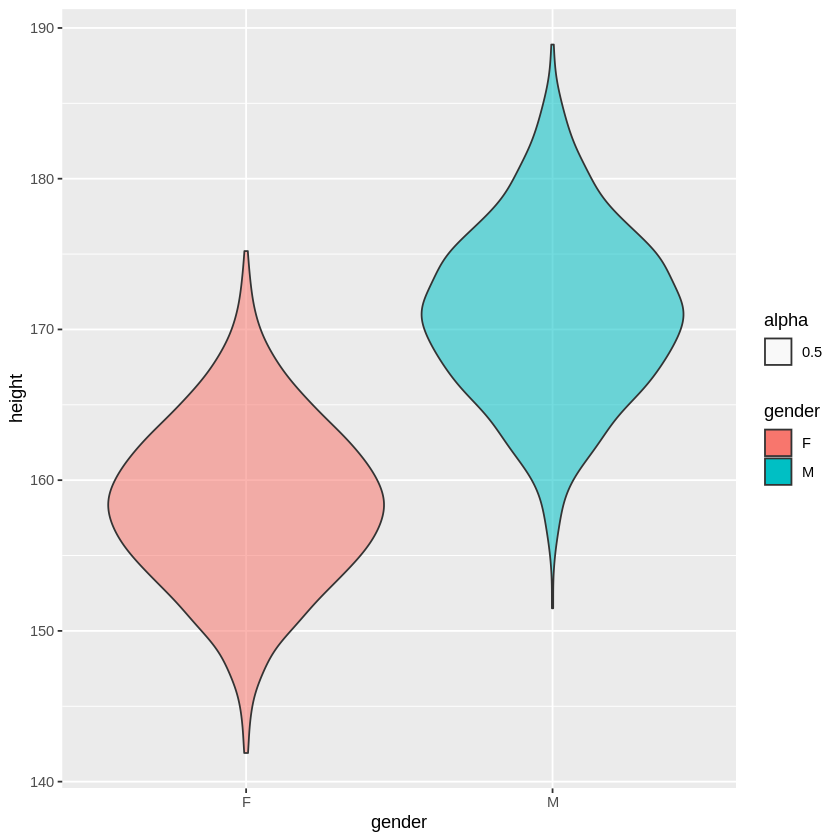

In [ ]:
# バイオリンプロットを描く
ggplot(DF) +
  geom_violin(aes(y=height,
                    x=gender,
                    fill=gender,
                    alpha=0.5))

Warning message:
“Ignoring unknown aesthetics: width”
ERROR while rich displaying an object: Error: Insufficient values in manual scale. 3 needed but only 2 provided.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_ha

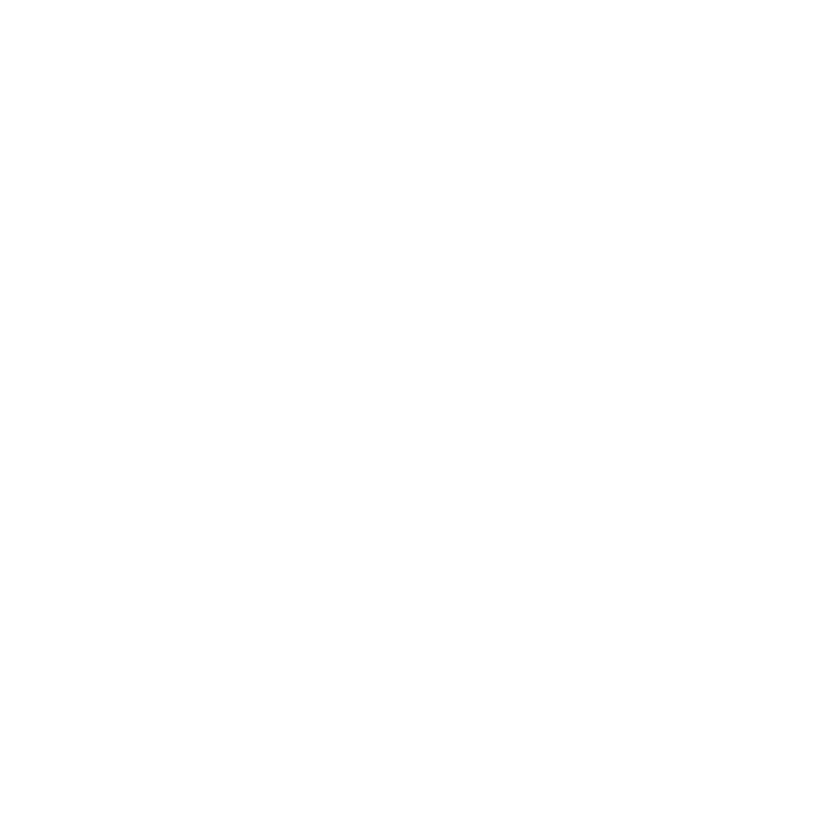

In [ ]:
# バイオリンプロットにボックスプロットを重ねて描く

ggplot(DF) +
  geom_violin(aes(y=height,
                    x=gender,
                    fill=gender,
                    alpha=0.5))+
  geom_boxplot(aes(y=height,  
                      x=gender,
                      fill="grey",
                      width=.2,     #幅を狭くする（20%）
                      alpha=0.7))+
  #色分けの指定を足す
  scale_color_manual(values=c("darkgreen", "orange")) +
  scale_fill_manual(values=c("darkgreen", "orange"))

Warning message:
“Ignoring unknown aesthetics: width”


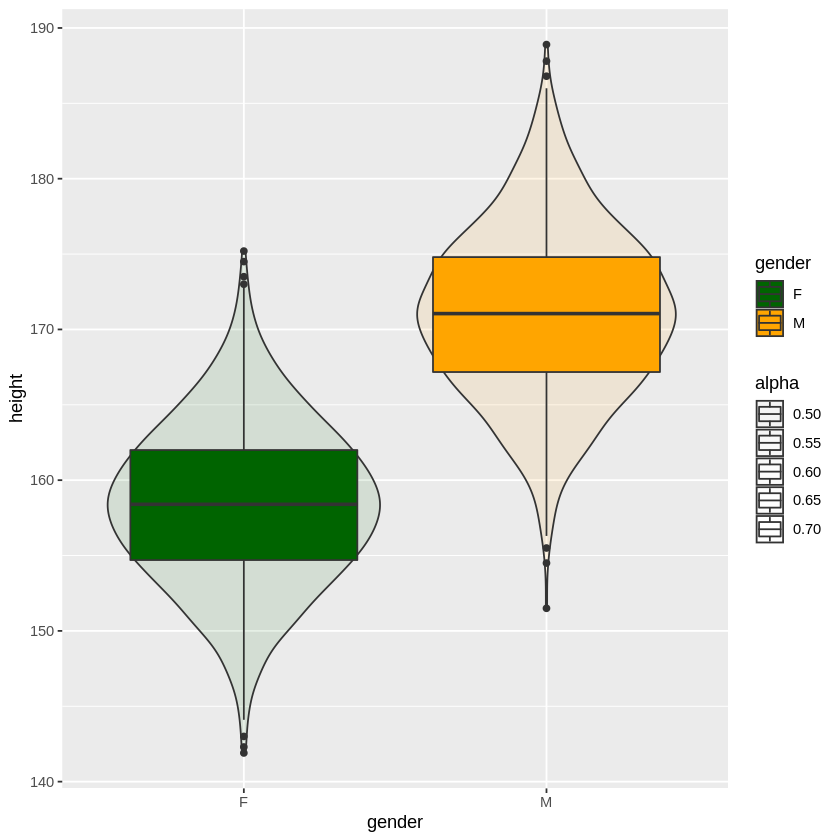

In [ ]:
# バイオリンプロットにボックスプロットを重ねて描く
ggplot(DF) +
  geom_violin(aes(y=height,
                    x=gender,
                    fill=gender,
                    alpha=0.5))+
  geom_boxplot(aes(y=height,
                      x=gender,
                      fill=gender, #ここをgenderにすると動く
                      width=.2,     #これは無視される“Ignoring unknown aesthetics: width”
                      alpha=0.7))+
  scale_color_manual(values=c("darkgreen", "orange")) +
  scale_fill_manual(values=c("darkgreen", "orange"))

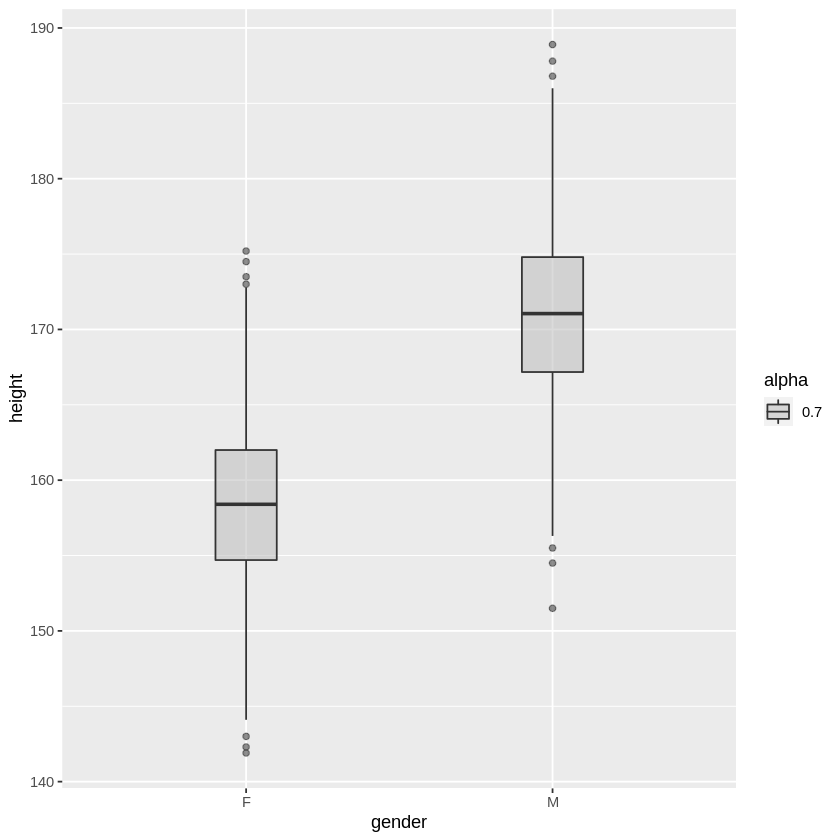

In [ ]:
# ボックスプロット部分だけ、、、
ggplot(DF) +
  geom_boxplot(aes(y=height,
                      x=gender,
                      alpha=0.7),
                 fill="grey", #aesの外に描くと適用された！！、
                 width=.2)+　#aesの外に描くと適用された！！
  scale_color_manual(values=c("darkgreen", "orange")) +
  scale_fill_manual(values=c("darkgreen", "orange"))

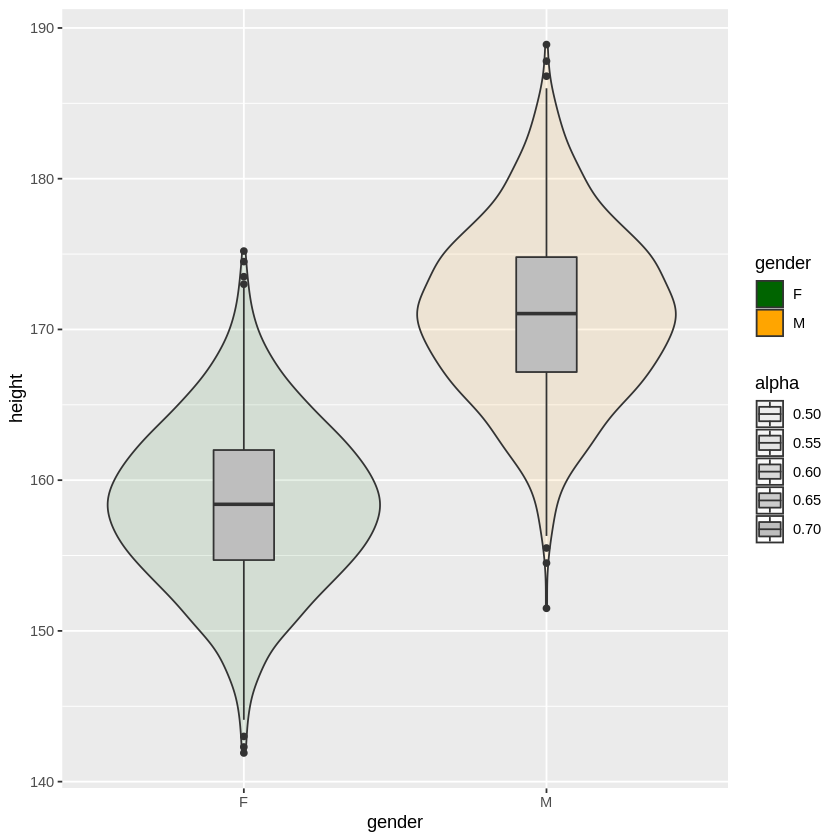

In [ ]:
# 改めてバイオリンプロットにボックスプロットを重ねて描く
ggplot(DF) +
  geom_violin(aes(y=height,
                    x=gender,
                    fill=gender,
                    alpha=0.5))+
  geom_boxplot(aes(y=height,
                      x=gender,
                      alpha=0.7),
                 fill="grey", #aesの外に描くと適用された！！、
                 width=.2)+　#aesの外に描くと適用された！！
  scale_color_manual(values=c("darkgreen", "orange")) +
  scale_fill_manual(values=c("darkgreen", "orange"))